# Homework 4 (100 points)
## Due: Tuesday, Sept 28 @ 6:30 PM 

**The very first thing you should do is save your own copy of this Homework by clicking on File -> "Save a copy in Drive"**

This homework is divided into 4 sections which each perform different tasks on the initial data provided.  Read the data description below carefully to understand the data, then work on each section.

When you complete this assignment, **please submit 1 file and 1 link via Canvas before the deadline.**

1.   Your Jupyter Notebook code as a .ipynb file (File -> "Download .ipynb")
2.   As a comment on your .ipynb submission please include a link to your Google CoLab Jupyter notebook. Click the "Share" button in the top right.  Ensure that anyone with the link has at least "Commenter" access. **Once you submit your HW on Canvas, please do not make any more edits to the Jupyter notebook until after your HW is graded**

Please use the naming convention:  

**firstname_lastname_homework4.ipynb**

**Until both steps 1 and 2 have been completed, your assignment is considered INCOMPLETE and you will receive -10% per day late until the assignment is completed.**


## Data Description

For this HW, we will be using a dataset of around 7K books with data on title, subtitle, authors, categories, thumbnail url, description, published year, average rating, and number of ratings.

You can download this dataset from the link below or from canvas as `books.csv`

Link to dataset: https://www.kaggle.com/dylanjcastillo/7k-books-with-metadata


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv("/content/drive/MyDrive/Data/books.csv")

In [4]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## Section 1: Top Authors
**20 points**

Produce the chart below, which shows the top 10 authors by count of books written in this dataset.

Hints:
- Use `.rename()` to rename columns
- Use `sns.catplot(kind="bar", color="teal" ... )`



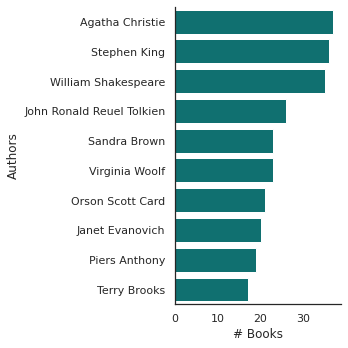

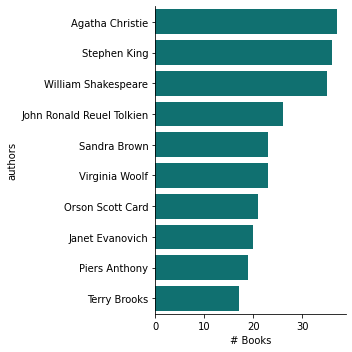

In [5]:
by_author = books.groupby(by=["authors"], as_index=False)['isbn13'].count()
by_author.rename(columns={'isbn13': '# Books'}, inplace=True)
by_author.sort_values(by="# Books", ascending=False, inplace=True)
sns.catplot(kind="bar", data=by_author.head(10), x="# Books", y="authors", color="teal")

## Section 2: Page Counts by Category
**20 points**

Create the following chart showing the distribution of page counts by category. 


*   Compare the following categories: 
  * Comics & Graphic Novels
  * Juvenile Fiction
  * History
  * Philosophy
*   Remove any books with > 1000 pages (the outliers)
*   Use `sns.displot` with `kind="hist"` (a histogram)
  *   Try different numbers of bins with `bins=` to find a good balance
  *   Plot multiple charts (one per category) on the FacetGrid
  *   Use `kde=True` to better visualize the distribution



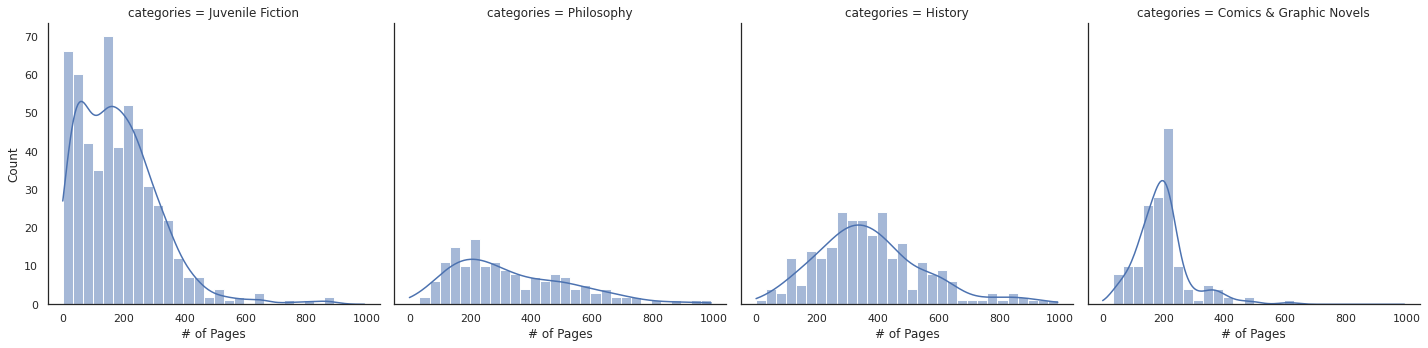

In [6]:
page_counts = books.loc[:,["title", "categories","num_pages"]]
#page_counts.num_pages = books.num_pages.astype(int)
page_counts.rename(columns={'num_pages': '# of Pages'}, inplace=True)
page_counts.head(20)

,title,categories,# of Pages
0,Gilead,Fiction,247.0
1,Spider's Web,Detective and mystery stories,241.0
2,The One Tree,American fiction,479.0
3,Rage of angels,Fiction,512.0
4,The Four Loves,Christian life,170.0
5,The Problem of Pain,Christian life,176.0
6,An Autobiography,"Authors, English",560.0
7,Empires of the Monsoon,"Africa, East",608.0
8,The Gap Into Madness,"Hyland, Morn (Fictitious character)",743.0
9,Master of the Game,Adventure stories,489.0


In [7]:
is_genre = page_counts.categories.isin(["Comics & Graphic Novels","Juvenile Fiction", "History", "Philosophy"])
is_under_1000 = page_counts['# of Pages'] <= 1000
is_both = page_counts[is_genre & is_under_1000].copy()
is_both.head(20)     

,title,categories,# of Pages
35,Ocean Star Express,Juvenile Fiction,32.0
37,The Princess of the Chalet School,Juvenile Fiction,159.0
98,The voyage of the Dawn Treader,Juvenile Fiction,216.0
102,Reason in History,Philosophy,95.0
104,The Presocratics,Philosophy,352.0
105,Spandau,History,463.0
108,Tyranny of the Majority,History,352.0
109,The Origins of the Civil Rights Movement,History,368.0
110,Presidential Power and the Modern Presidents,History,384.0
111,"Rest, Rabbit, Rest",Juvenile Fiction,32.0


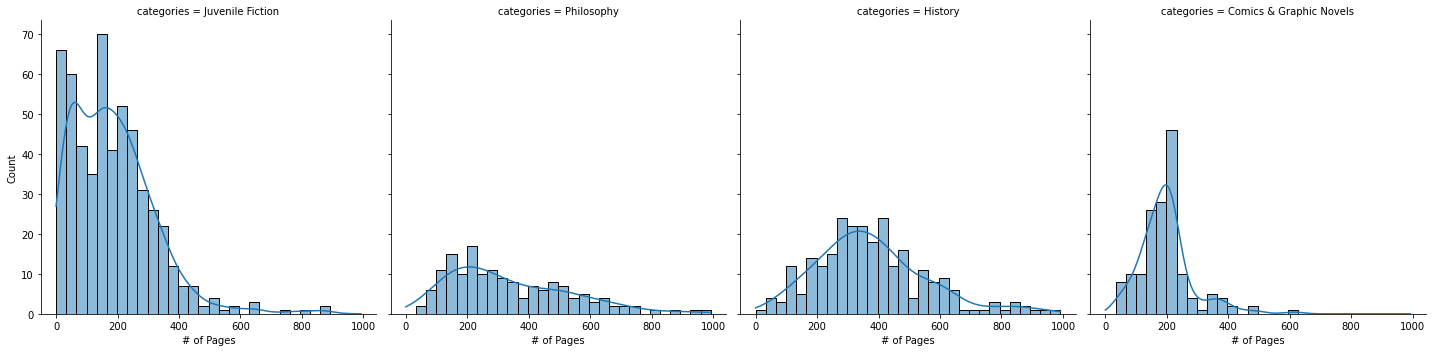

In [8]:
# Adding a hue plots multiple distributions
# Can also use bins=N to specify the number of bins you want to bucket the data into
sns.displot(kind='hist', data=is_both, x="# of Pages", discrete=False, col="categories", kde=True, bins=30)

## Section 3: Rating Comparison for Top Authors
**20 points for each part (Total 40 points)**

**Part 1:**

Create a box plot as shown below showing the distribution of `average_rating` for the set of authors provided below.  (Color used is `salmon`)

Make sure to rename the axes.



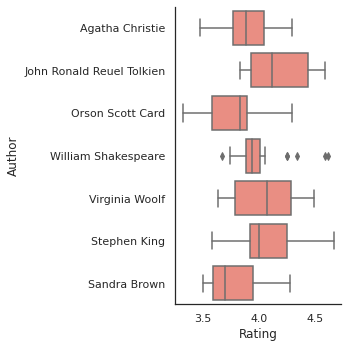

In [9]:
books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [10]:
authors = [
    "Agatha Christie", 
    "Virginia Woolf", 
    "Stephen King", 
    "William Shakespeare", 
    "John Ronald Reuel Tolkien",
    "Sandra Brown",
    "Orson Scott Card"
]
new_book_list = books.loc[:,["authors","title","average_rating","isbn13"]].dropna().drop_duplicates()
authors_list = new_book_list[new_book_list.authors.isin(authors)].copy()
authors_list.rename(columns={'authors': 'Author', 'average_rating': "Rating"}, inplace=True)

authors_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 6 to 6716
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Author  195 non-null    object 
 1   title   195 non-null    object 
 2   Rating  195 non-null    float64
 3   isbn13  195 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ KB


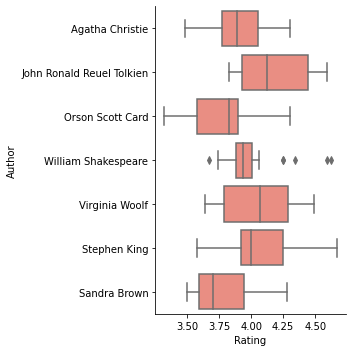

In [11]:
sns.catplot(kind="box", data=authors_list, x="Rating", y="Author", color="salmon")

**Part 2:**

Create a point plot showing each author's top 10 books (by average rating), sorted from highest to lowest.  This will help identify which authors are "one hit wonders" and which ones are more consistent across their novels. 

Hints:
*   You will need to sort by `average_rating` **within** each author group. To do this, first write a function called `sort_and_top_10`.  This function will take a pandas dataframe as input, then sort by rating in descending order and grab the top 10 rows only.
*   Next group by `authors`, then use `apply` and pass in your `sort_and_top_10` function to `apply` to sort each author group by the rating.
*   When plotting, use `sns.catplot` and `kind="point"`. 
*  Set `sharey` to False as each chart will have different values on the y-axis (the book titles) so we don't want to share this axis.
*  Use `aspect` to increase the width of the charts to make it more readable 



In [18]:
def sort_and_top_10(authors_list):
  authors_list = authors_list.sort_values(by=["Rating"], ascending=False)
  return authors_list.head(10)

In [19]:
authors_list = authors_list.groupby(by=["Author"], as_index=False)

In [20]:
authors_list = authors_list.apply(sort_and_top_10)

In [21]:
authors_list.rename(columns={'title': 'Title'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


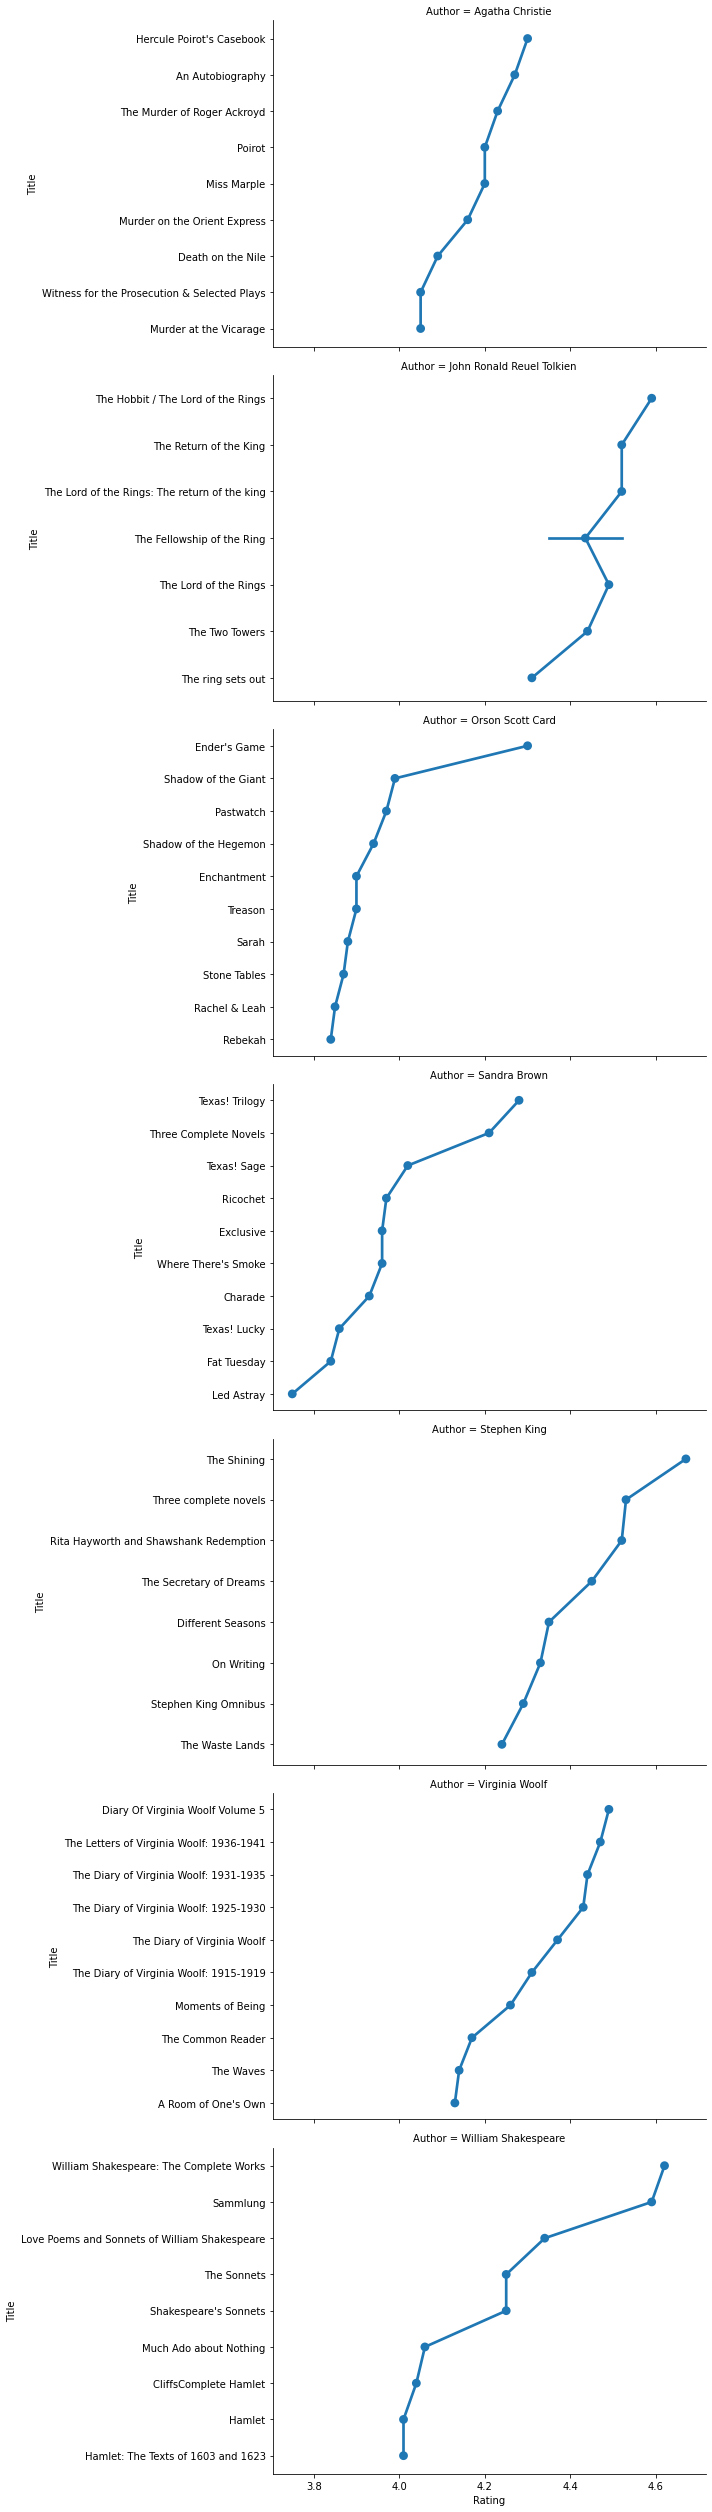

In [23]:
sns.catplot(kind="point", data=authors_list, x="Rating", y="Title", row="Author", sharey=False, aspect=2)

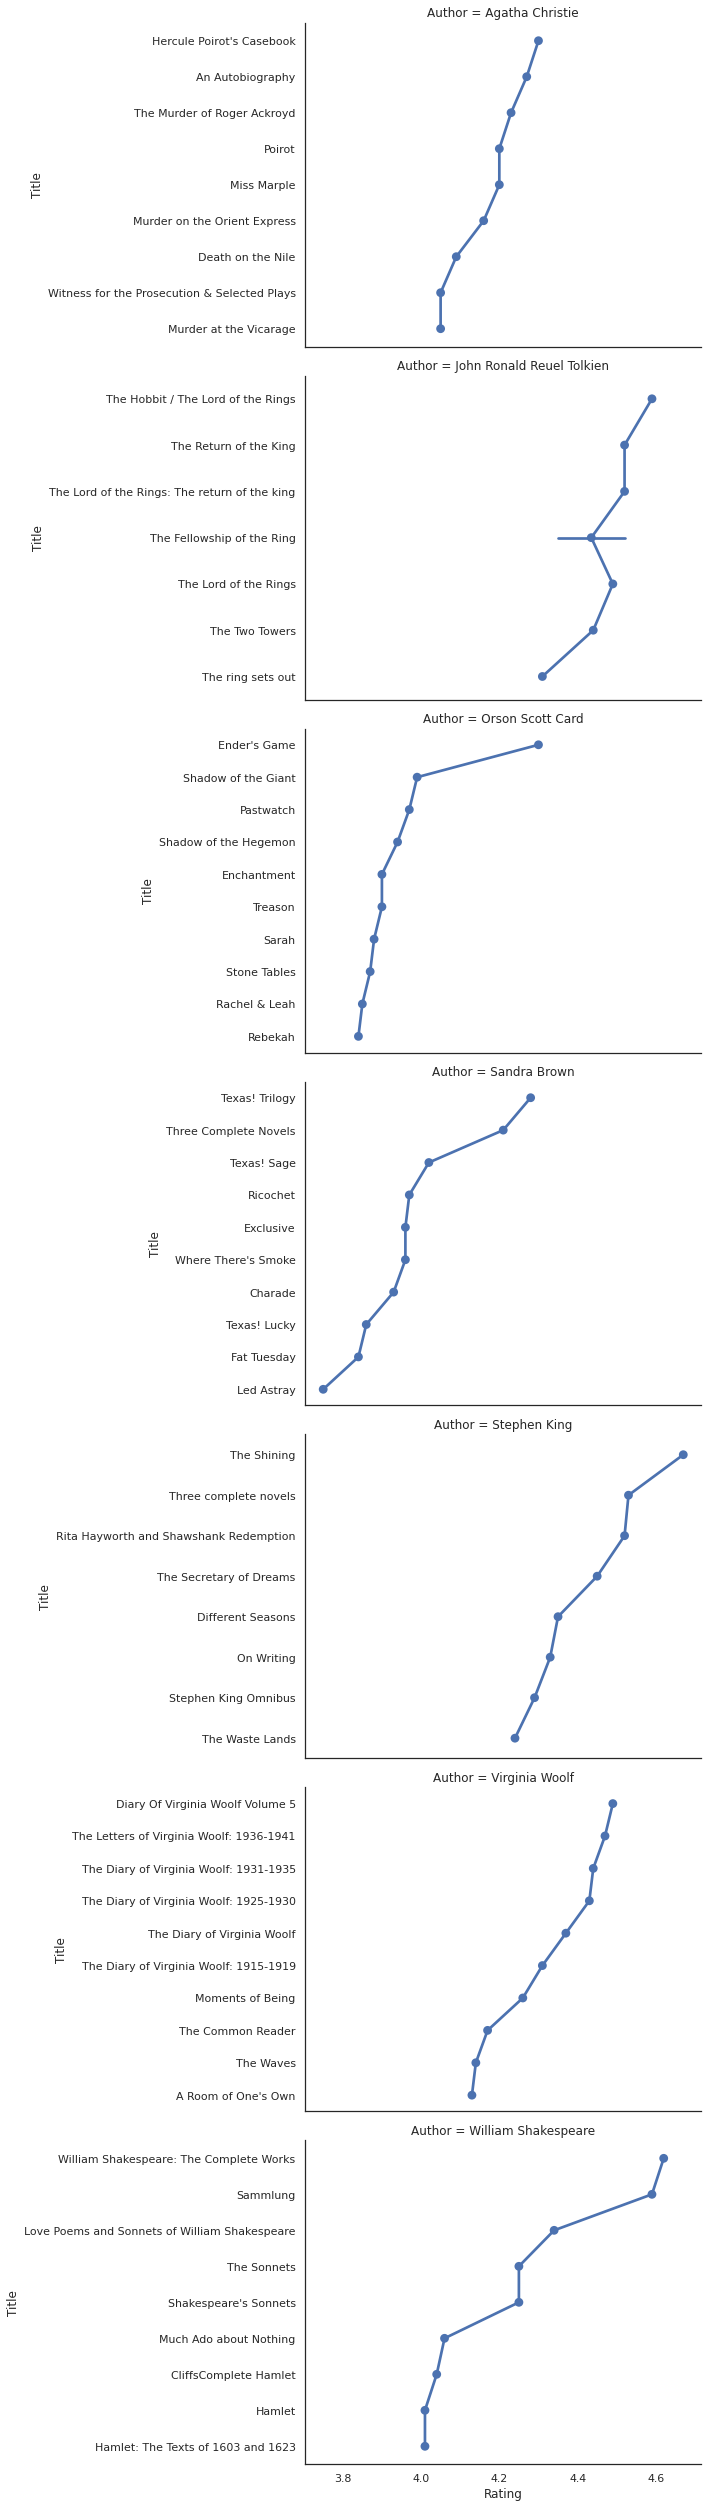

## Section 4: Create your own visualization
**20 points (15 points for the visual, 5 points for the insight)**

Use this books dataset to create your own visualization of reasonable complexity (aggregate and/or filter the data first, then visualize with seaborn).  Then write 2-3 sentences about the insight gained from your visualization.



#Question: 
Have books gotten better over time? 

**Solution:**
Compare average rating per decade

**Plan of attack:**

2. Convert the published_year into a string (from a float) 
3. Convert published_year into decade and populate new decade column
3. Group by decade and average the average_rating column
4. Produce a point plot showing the average per decade

In [ ]:
#books.info()
#confirming that published_year was bring stored as a float

In [24]:
def year_to_decade(published_year):
    published_year_str = str(published_year)
    return published_year_str[0:3] + '0s'

In [25]:
books['Decade'] = books.published_year.transform(year_to_decade)
decade_list = books.loc[:,["title", "published_year", "average_rating","Decade"]].dropna()

In [26]:
decade_list_count = decade_list.groupby(by=["Decade"], as_index=False)["average_rating"].mean()
decade_list_count.sort_values(by="Decade", ascending=True, inplace=True)
decade_list_count.rename(columns={'average_rating': 'Average Rating'}, inplace=True)

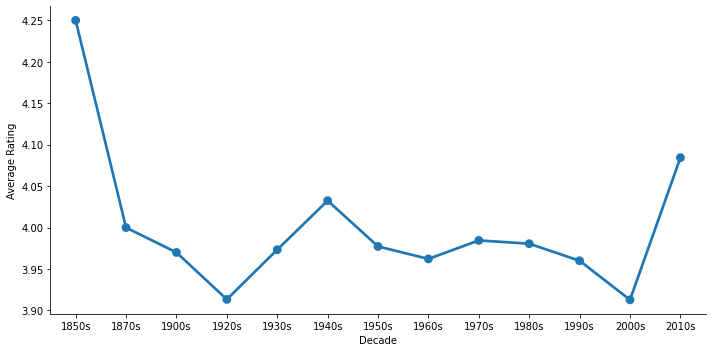

In [27]:
sns.catplot(kind="point", data=decade_list_count, x="Decade", y="Average Rating", aspect=2)

**1.** 
From the results we can see that no other decade has come close to as high of average ratings as the 1850's so this must have been a good decade for books. 

**2.** Most decades' books range on between 3.95-4.00, with the exception of the 1920's & 2000's where average ratings dipped to their lowest, and 1940's where there was a subtle uptick in well-received books. So on average books are scored somewhat generously on a 5-point scale if the majority of years the average score is between 79-80%.

**3.** Finally, we can see that from 2000-2010 book ratings have been on a significant incline. Maybe this decade (2020) will be another decade of growth in ratings, and we we'll have more classics produced like in the 50's.

**4.** Have books gotten better over time? No, they have gotten worse since the the 1850's, though only marginally worse and have remained steady at a decent average rating since.